# Sprint 9 Project - Machine Learning in Business

## Project Overview

**Project Objective -** I work for the OilyGiant mining company, and my task is to find the best place for a new well. 

**To choose a new location I will -**

- Collect the oil well parameters for each of the selected region: oil quality and volume of reserves
- Build a model for predicting the volume of reserves in the new wells
- Pick the oil wells with the highest estimated values
- Pick the region with the highest total profit for the selected oil wells
- Build a model that will help to pick the region with the highest profit margin
   - Analyze potential profit and risks using the Bootstrapping technique

## Project Conditions

**Before begining the project, there are a few assumptions, parameters, and guiding criteria/conditons that I must note before continuing with this analysis. I will adhere to these items as I work through this task -**

- Only a linear regression is suitable for model training (the rest are not sufficiently predictable)
- When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation
- The budget for development of 200 oil wells is 100 USD million
- One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels)
- After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. 
  - From the ones that fit - the criteria, the region with the highest average profit should be selected.
  
I will note some of these points again as I work through the project, but these all come from the project prompt.

##  Import Libraries

In [3]:
# Import libraries required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# From sklearn get linear regression model, model evaluation packages, and training data split
from sklearn.linear_model import LinearRegression

# Split dataset for training
from sklearn.model_selection import train_test_split

# For calculating mean square error 
from sklearn.metrics import mean_squared_error

# For creating a histogram in the profit distribution section
from matplotlib import pyplot as plt

# Show all columns when displaying dataframe
pd.set_option('display.max_columns', None)

Cell below is used to align the tables in the markdown to the left

In [6]:
%%html
<style>
table {float:left}
</style>

## Read in Data

In [24]:
# Read in CSVs containing oil samples from three regions
region_A = pd.read_csv('/Users/Engcharm/Downloads/oilygiant mining/geo_data_0.csv')
region_B = pd.read_csv('/Users/Engcharm/Downloads/oilygiant mining/geo_data_1.csv')
region_C = pd.read_csv('/Users/Engcharm/Downloads/oilygiant mining/geo_data_2.csv')

### Description of Fields in Dataset

*Below is a description of all of the fields in the dataset that I will be working with to build and train my models and complete the analysis*

**Features**
- `id` — unique oil well identifier
- `f0, f1, f2` — three features of points (their specific meaning is unimportant, but the features themselves are significant)

**Target**
- `product` — volume of reserves in the oil well (thousand barrels)


### Check Sample of Each Data Set

In [29]:
# Print sample of each dataframe
print(region_A.head())
print(region_B.head())
print(region_C.head())

# Print shape of each dataframe
print()
print(region_A.shape)
print(region_B.shape)
print(region_C.shape)

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

(100000, 5)
(100000, 5)
(100000, 5)


### Explore Each Region's Dataset

#### Explore Region A Dataset

In [33]:
# Use print so I don't lose outputs

# Check for missing values
print('Check for Missing Values')
print(region_A.isna().sum())

# Check values for each column
print('\n Describe Dataframe')
print(region_A.describe())

# Check data types
print('\n Check Data Types')
print(region_A.info())
#print(churn.dtypes)

# Check for duplicate rows
print('\n Check for Duplicate Rows')
print(region_A[region_A['id'].duplicated(keep=False)].sort_values(by=['id']))

# Find duplicate ids in dataset
region_A[region_A['id'].duplicated(keep=False)]['id'].unique()

Check for Missing Values
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

 Describe Dataframe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

 Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float6

array(['HZww2', 'bxg6G', 'QcMuo', 'A5aEY', 'fiKDv', 'Tdehs', 'AGS9W',
       'TtcGQ', '74z30', 'bsk9y'], dtype=object)

#### Explore Region B Dataset

In [36]:
# Use print so I don't lose outputs

# Check for missing values
print('Check for Missing Values')
print(region_B.isna().sum())

# Check values for each column
print('\n Describe Dataframe')
print(region_B.describe())

# Check data types
print('\n Check Data Types')
print(region_B.info())
#print(churn.dtypes)

# Check for duplicate rows
print('\n Check for Duplicate Rows')
print(region_B[region_B['id'].duplicated(keep=False)].sort_values(by=['id']))

# Find duplicate ids in dataset
region_B[region_B['id'].duplicated(keep=False)]['id'].unique()

Check for Missing Values
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

 Describe Dataframe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.734063       5.019721     137.945408

 Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float6

array(['LHZR0', 'bfPNe', '5ltQ6', 'wt4Uk'], dtype=object)

#### Explore Region C Dataset

In [39]:
# Use print so I don't lose outputs

# Check for missing values
print('Check for Missing Values')
print(region_C.isna().sum())

# Check values for each column
print('\n Describe Dataframe')
print(region_C.describe())

# Check data types
print('\n Check Data Types')
print(region_C.info())
#print(churn.dtypes)

# Check for duplicate rows
print('\n Check for Duplicate Rows')
print(region_C[region_C['id'].duplicated(keep=False)].sort_values(by=['id']))

# Find duplicate ids in dataset
region_C[region_C['id'].duplicated(keep=False)]['id'].unique()

Check for Missing Values
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

 Describe Dataframe
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.844801      16.739402     190.029838

 Check Data Types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float6

array(['VF7Jo', 'xCHr8', 'Vcm5J', 'KUPhW'], dtype=object)

### Data Exploration Findings

There are a few findings which I've listed below from my data exploration. **I will address and changes that need to be made from my data exploration in Section 4.6: Prepare Data From Training -** 
1. There are no missing values in any of the region's datasets
2. Datatypes are set correctly from ingestion. No datatype conversions required
3. **There are duplicate ids within each region's dataset which means that there are oil wells that are not unique. I will remove these IDs from the dataset since as I am unsure of which record is correct.**
4. Because the oil well ids are string values, I will not be able to be include them in the model. I cannot convert these oil wells to the numerical labels because the cardinality is much too high. For this reason, I am going to remove 'id' from the datasets for traning purposes.

### Prepare the Data for Training 

In [44]:
# Remove duplicate ids in each regions data sets
# Start by getting list of duplicated ids in each region
region_A_duplicated_ids = region_A[region_A['id'].duplicated(keep=False)]['id'].unique()
region_B_duplicated_ids = region_B[region_B['id'].duplicated(keep=False)]['id'].unique()
region_C_duplicated_ids = region_C[region_C['id'].duplicated(keep=False)]['id'].unique()

# Confirm count of duplicated ids are in the list
print(len(region_A_duplicated_ids))
print(len(region_B_duplicated_ids))
print(len(region_C_duplicated_ids))

# Remove ids from each regions df 
region_A = region_A.query("id not in @region_A_duplicated_ids")
region_B = region_B.query("id not in @region_B_duplicated_ids")
region_C = region_C.query("id not in @region_C_duplicated_ids")

# Confirm count of duplicated ids are in the list
region_A[region_A['id'].duplicated(keep=False)]['id'].unique()
region_B[region_B['id'].duplicated(keep=False)]['id'].unique()
region_C[region_C['id'].duplicated(keep=False)]['id'].unique()

# Duplicates removed

10
4
4


array([], dtype=object)

In [46]:
# Drop ID from each region's dataset to be used for tranining
region_A = region_A.drop('id', axis=1)
region_B = region_B.drop('id', axis=1)
region_C = region_C.drop('id', axis=1)

## Train & Test the Model For Each Region

*__In this section, I will -__*

 - Split each region's data into a training set and validation set at a ratio of 75:25
 - Train the model and make predictions for the validation set
 - Save the predictions and correct answers for the validation set
 - Print the average volume of predicted reserves and model RMSE
 - Analyze the results

**Note -** Because we are predicting volume of oil reserves, this is a regression problem and not a classification problem. For this reason and because of the project requirements, I will select a linear regression model.

### Split Data into a Training & Validation Set at a Ratio of 75:25 For Each Region

#### Split Dataset into Features & Target

In [52]:
# Create target and feature datasets
# Product will be the target

# Region A
target_A = region_A['product']
features_A = region_A.drop('product', axis=1)

# Region B
target_B = region_B['product']
features_B = region_B.drop('product', axis=1)

# Region C
target_C = region_C['product']
features_C = region_C.drop('product', axis=1)

#### Split Data into Training & Validation Set at a Ratio of 75:25

In [55]:
# Create Training and Validation Test Datasets. Split 3:1
# We will split .75 to get a training dataset and 25% to get validation
# Set Random State to 12345 to Replicate Training Set in Future

# Region A
features_train_A, features_valid_A, target_train_A, target_valid_A = train_test_split(
    features_A, target_A, test_size=0.25, random_state=12345)

# Check the sizes of the training, validation, and test sets for 3:1:1 ratio
# Training 
print('Region A Training & Validation Datasets')
print(features_train_A.shape) # Training set contains 75% of original dataframe rows 
print(target_train_A.shape)   # Training set contains 75% of original dataframe rows 

# Validation
print(features_valid_A.shape) # Validation set contains 25% of original dataframe rows 
print(target_valid_A.shape)   # Validation set contains 25% of original dataframe rows 

############################################################################################################

# Region B
features_train_B, features_valid_B, target_train_B, target_valid_B = train_test_split(
    features_B, target_B, test_size=0.25, random_state=12345)

# Check the sizes of the training, validation, and test sets for 3:1:1 ratio
# Training 
print()
print('Region B Training & Validation Datasets')
print(features_train_B.shape) # Training set contains 75% of original dataframe rows 
print(target_train_B.shape)   # Training set contains 75% of original dataframe rows 

# Validation
print(features_valid_B.shape) # Validation set contains 25% of original dataframe rows 
print(target_valid_B.shape)   # Validation set contains 25% of original dataframe rows 

############################################################################################################

# Region C
features_train_C, features_valid_C, target_train_C, target_valid_C = train_test_split(
    features_C, target_C, test_size=0.25, random_state=12345)

# Check the sizes of the training, validation, and test sets for 3:1:1 ratio
# Training 
print()
print('Region C Training & Validation Datasets')
print(features_train_C.shape) # Training set contains 75% of original dataframe rows 
print(target_train_C.shape)   # Training set contains 75% of original dataframe rows 

# Validation
print(features_valid_C.shape) # Validation set contains 25% of original dataframe rows 
print(target_valid_C.shape)   # Validation set contains 25% of original dataframe rows 

Region A Training & Validation Datasets
(74985, 3)
(74985,)
(24995, 3)
(24995,)

Region B Training & Validation Datasets
(74994, 3)
(74994,)
(24998, 3)
(24998,)

Region C Training & Validation Datasets
(74994, 3)
(74994,)
(24998, 3)
(24998,)


### Train Model & Make Predictions For Each Region's Validation Set
*__Now that I have split my dataset into training and validation datasets, I can train my model. In this step, I will -__*
 - Train Model & Make Predictions For Validation Set
 - Save Predictions & Correct Answers for Validation Set

In [58]:
# Use LinearRegression Model for predictions 
model = LinearRegression()

# Fit the model to the training dataset
model.fit(features_train_A, target_train_A)
model.fit(features_train_B, target_train_B)
model.fit(features_train_C, target_train_C)

# Predict the target values for the validation set using model fit to training dataset
predictions_valid_A = model.predict(features_valid_A)
predictions_valid_B = model.predict(features_valid_B)
predictions_valid_C = model.predict(features_valid_C)

### Print Average Volume of Predicted Reserves & Model RMSE
**RMSE, otherwise known as Root Mean Square Error,** is measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy).

In [61]:
# Region A
print('Region A Results')

# Calculate the RMSE by raising the MSE to the 1/2 power
result_A = mean_squared_error(target_valid_A, predictions_valid_A)**0.5

# Print the RMSE of the Model
print("RMSE of the Linear Regression Model on the Validation Set is:", round(result_A,2))

# Print the Average Volume of Predicted Reserves from the Validation set
print("Average Volume of Predicted Reserves from the Validation set is:", round(predictions_valid_A.mean(),2))

##############################################################################

# Region B
print()
print('Region B Results')

# Calculate the RMSE by raising the MSE to the 1/2 power
result_B = mean_squared_error(target_valid_B, predictions_valid_B)**0.5

# Print the RMSE of the Model
print("RMSE of the Linear Regression Model on the Validation Set is:", round(result_B,2))

# Print the Average Volume of Predicted Reserves from the Validation set
print("Average Volume of Predicted Reserves from the Validation set is:", round(predictions_valid_B.mean(),2))

##############################################################################

# Region C
print()
print('Region C Results')

# Calculate the RMSE by raising the MSE to the 1/2 power
result_C = mean_squared_error(target_valid_C, predictions_valid_C)**0.5

# Print the RMSE of the Model
print("RMSE of the Linear Regression Model on the Validation Set is:", round(result_C,2))

# Print the Average Volume of Predicted Reserves from the Validation set
print("Average Volume of Predicted Reserves from the Validation set is:", round(predictions_valid_C.mean(),2))

Region A Results
RMSE of the Linear Regression Model on the Validation Set is: 38.97
Average Volume of Predicted Reserves from the Validation set is: 95.11

Region B Results
RMSE of the Linear Regression Model on the Validation Set is: 44.81
Average Volume of Predicted Reserves from the Validation set is: 95.46

Region C Results
RMSE of the Linear Regression Model on the Validation Set is: 39.98
Average Volume of Predicted Reserves from the Validation set is: 95.12


### Analyze The Results of the Model

After training the model and fitting the model to the validation data set, the model produced the following results - 
 - The Average Volume of Predicted Reserves for all three regions is approximately ~95 
 - Region A had the lowest RMSE (38.97), followed closely by Region C (39.98). Again, RMSE measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy). Given this, I would say that the LinearRegression Model doesn't provide the best results as the RMSE is almost half of the average volumen of predicted reserves. In future analysis, we might be to try different models to minimize our RMSE to get model predictions closer to our actual values.
 

## Prepare For Profit Calculation

*__In this section, I will -__*

 - Store all key values for calculations in separate variables, which will be used in the profit function
 - Calculate the volume of reserves sufficient for developing a new well without losses
     - Compare the obtained value with the average volume of reserves in each region
 - Provide the findings about the preparation for profit calculation step

**There are a few considerations that need to be discussed when determining profitable regions -**
1. We have a budget of 100 Million USD when scoping out which regions would be worthwhile to invest in
2. The budget of 100 million will go towards developing 200 oil wells
3. The revenue from one unit of product is 4,500 dollars
    - Volume of reserves is in thousand barrels where one barrel of raw materials brings 4.5 USD of revenue (4.5 USD a barrel multipied by 1000 barrels) 
4. After our risk evaluation, we will keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.

### Store All Key Values for Calculations in Separate Variables
We will create variables for **budget, well sample size, and revenue per unit which will be used a parameters in our profit function**

In [68]:
# Create variable for budget
budget_amount = 100000000

# Create variable for well sample size
well_sample_size = 200

# Create variable for revenue per unit
revenue_per_unit = 4500

### Calculate the Volume of Reserves Sufficient for Developing a New Well Without Losses
The calculation in the cell below will tell us the minumum volume of oil a well would need to produce, on average, in order to breakeven on our investment given that the revenue for one volume unit generates $4,500 USD.

*__The calculation will be -__*

`(Total Budget / Revenue Per Well) / 200 Wells = Minimum Average Volume Per Well`

In [71]:
# Calculate minimum volume per well  
average_volume_per_well = (budget_amount /revenue_per_unit) / well_sample_size

# Print result
print('The minimum volume of oil each well would need to produce to break even is', round(average_volume_per_well,2))

The minimum volume of oil each well would need to produce to break even is 111.11


### Compare the Obtained Value With the Average Volume of Reserves in Each Region
The cell below will calculate the average oil volume per well for each region so that we can see how it compares to the breakeven volume. 

In [74]:
# Caculate the average oil volume per well for each region 
region_A_average = region_A['product'].mean()
region_B_average = region_B['product'].mean()
region_C_average = region_C['product'].mean()

# Print volumes for each region
print('On average, the volume of oil each well in Region A produces is', round(region_A_average,2))
print('On average, the volume of oil each well in Region B produces is', round(region_B_average,2))
print('On average, the volume of oil each well in Region C produces is', round(region_C_average,2))

On average, the volume of oil each well in Region A produces is 92.5
On average, the volume of oil each well in Region B produces is 68.82
On average, the volume of oil each well in Region C produces is 95.0


**Compared to the breakeven volume of 111.11, Regions A (92.5), B (68.82), and C (95.0), on average, produce a lot less oil. Investing at this point would maybe not be profitable. We are going to have to do some more analysis before we invest our money in any of these regions.**

## Write Function to Calculate Profit From Set of Selected Oil Wells & Model Predictions

*__In this section, I will -__*

 - Pick the wells with the highest values of predictions from the model 
 - Summarize the target volume of reserves in accordance with these predictions
 - Provide findings: suggest a region for oil wells' development and justify the choice. 
   - Calculate the profit for the obtained volume of reserves.

In [78]:
# Create function to calculate revenue for wells with the top 200 highest predicted oil reserves
def calculate_profit(target, probabilities, count, budget, revenue, region):
    
    # Convert target and probabilities into series
    target_series = pd.Series(target)
    predictions_series = pd.Series(probabilities)
        
    # Reset the index on the target
    target_series = target_series.reset_index(drop=True)
    
    # Sort the predictions by the volume desc and select the indicies of the top 200 oil producing wells
    # These indicies will be used to filter for the actual values of those top 200 wells so that we can calculate revenue
    top_wells = predictions_series.sort_values(ascending=False).head(count).index
    
    # Get the volume of oil from the top 200 wells 
    actual_volume = target_series.loc[top_wells].sum()
    
    # Get the average volume of oil from the top 200 wells 
    average_volume = target_series.loc[top_wells].mean()
    
    # Create calcuation for revenue
    # Revenue is the volume of oil for top 200 wells multiplied by $4500
    revenue_calc = actual_volume * revenue_per_unit
    
    # Profit is defined as the revenue minus our budget of $100 Million USD to purchase 200 wells in a region
    profit = revenue_calc - budget_amount
    
    # Return values after running function
    print(region)
    print('The total oil reserve size for', region, 'is', round(actual_volume,2))
    print('The average volume per the top 200 wells in', region, 'is', round(average_volume,2))
    print('The revenue for', region, 'is', round(revenue_calc,2))
    print('The profit for', region, 'is', round(profit,2))
    print()
    
# Call function to calculate revenue and profit per region and other metrics per region    

# Region A
calculate_profit(target_valid_A, predictions_valid_A, well_sample_size, budget_amount, revenue_per_unit, 'Region A')

# Region B
calculate_profit(target_valid_B, predictions_valid_B, well_sample_size, budget_amount, revenue_per_unit, 'Region B')

# Region C
calculate_profit(target_valid_C, predictions_valid_C, well_sample_size, budget_amount, revenue_per_unit, 'Region C')

Region A
The total oil reserve size for Region A is 27525.41
The average volume per the top 200 wells in Region A is 137.63
The revenue for Region A is 123864348.34
The profit for Region A is 23864348.34

Region B
The total oil reserve size for Region B is 27137.65
The average volume per the top 200 wells in Region B is 135.69
The revenue for Region B is 122119420.42
The profit for Region B is 22119420.42

Region C
The total oil reserve size for Region C is 27702.1
The average volume per the top 200 wells in Region C is 138.51
The revenue for Region C is 124659457.92
The profit for Region C is 24659457.92



### Summarize The Findings - Suggest a Region for Development & Justify the Choice

In the previous cell, we wanted to understand how much volume the top 200 oil wells produce in each region. To do this, we took the follow steps -

1. Using the model's predicted volume for each oil well in region, we create a list of the top 200 wells in each region. 
2. Using the incidices of these 200 wells, we select the actual volume of these wells from the target validation set
3. Using the actual volume of the top 200 wells in each region, we sum the volume of each well to get a total volume for the region.
4. We multiple the total volume by \$4,500 which is the price per 1000 barrels per one unit of volume. This will give us revenue for the top 200 wells in each region.
5. If we subtract our budget of $100 Million USD from each region's revenue, we will know the profit the region is expected to make us if we invest in the creation of 200 wells in that region. 

With this methodology, **the region that will produce the greatest profit is Region C.** The expected profits of each region are listed below - 
 - **Region C - \$24,659,457.92**
 - Region A - \$23,864,348.34
 - Region B - \$22,119,420.42
 
Additionally, to break even, we needed a volume on average of 111.11. When we pick the top 200 wells in each region, we see that the volume far exceeds 111.11. There is a chance now that we can be profitable, but we will need to calculate the risk of having losses in each region, which will be calculated in one of the sections below. 


## Calculate Risks & Profit For Each Region

*__In this section, I will -__*

 - Use the bootstrapping technique with 1000 samples to find the distribution of profit
 - Find average profit, 95% confidence interval and risk of losses. Loss is negative profit, calculate it as a probability and then express as a percentage
 - Provide findings: suggest a region for development of oil wells and justify the choice

### Use Bootstrapping Technique With 1000 Samples to Find the Distribution of Profit

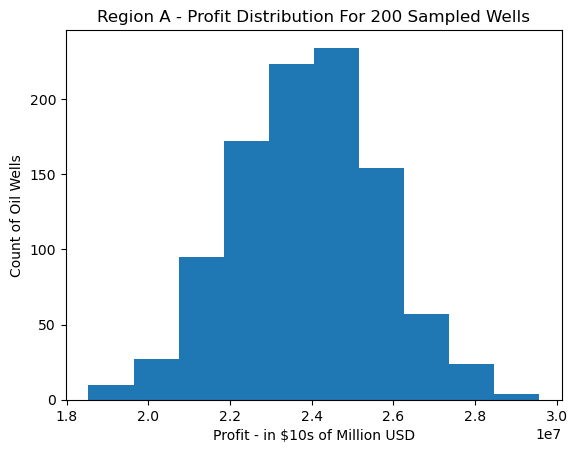

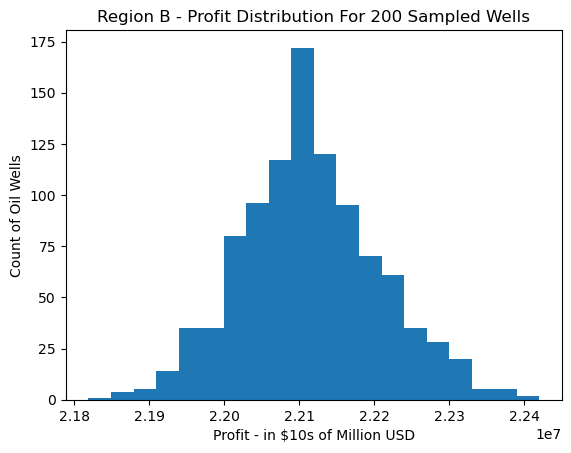

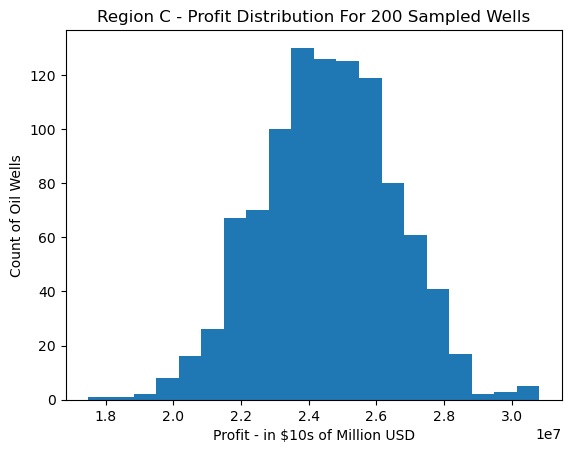

In [84]:
# Create function to calculate revenue for wells with the top 200 highest predicted oil reserves
def calculate_profit_bootstrap(target, probabilities, count, budget, revenue, region):
        
    # Convert target and probabilities into series
    target_series = pd.Series(target)
    predictions_series = pd.Series(probabilities)
        
    # Reset the index on the target
    target_series = target_series.reset_index(drop=True)
    
    # Reset the index on the predictions
    predictions_series = predictions_series.reset_index(drop=True)
      
    # Sort the predictions by the volume desc and select the indicies of the top 200 wells
    # Take a sample of the top 200 wells using replacement
    # We want to do replacement because we want to find the average of volume of selecting any of the top 200 wells 200 times
    # These indicies will be used to filter for the actual values of those top 200 wells so that we can calculate revenue
    top_wells = predictions_series.sort_values(ascending=False).head(well_sample_size).sample(n=200, replace=True).index
   
    # Get the volume of oil from the top 200 wells that were sampled
    actual_volume = target_series.loc[top_wells].sum()
    
    # Create calcuation for revenue
    # Revenue is the volume of oil for top 200 wells multiplied by $4500
    revenue_calc = actual_volume * revenue_per_unit
    
    # Profit is defined as the revenue minus our budget of $100 Million USD to purchase 200 wells in a region
    profit = revenue_calc - budget_amount
       
    # Return profit
    return profit

#Create a list to hold each regions profit samples
region_A_values = []
region_B_values = []
region_C_values = []

#Run profit fucntion 1000 times and write the results to the respective lists
for i in range(1000):
    region_A_values.append(calculate_profit_bootstrap(target_valid_A, predictions_valid_A, well_sample_size, budget_amount, revenue_per_unit, 'Region A'))
    region_B_values.append(calculate_profit_bootstrap(target_valid_B, predictions_valid_B, well_sample_size, budget_amount, revenue_per_unit, 'Region B'))
    region_C_values.append(calculate_profit_bootstrap(target_valid_C, predictions_valid_C, well_sample_size, budget_amount, revenue_per_unit, 'Region C'))
     
        
# Plot distributions of profit from sampling the top 200 wells in each region     
# Region A
plt.hist(region_A_values)
plt.title('Region A - Profit Distribution For 200 Sampled Wells')
plt.xlabel('Profit - in $10s of Million USD')
plt.ylabel('Count of Oil Wells')
plt.show()

# Region B
plt.hist(region_B_values, bins=20)
plt.title('Region B - Profit Distribution For 200 Sampled Wells')
plt.xlabel('Profit - in $10s of Million USD')
plt.ylabel('Count of Oil Wells')
plt.show()

# Region C
plt.hist(region_C_values, bins=20)
plt.title('Region C - Profit Distribution For 200 Sampled Wells')
plt.xlabel('Profit - in $10s of Million USD')
plt.ylabel('Count of Oil Wells')
plt.show()

The distributions for each region look to be normally distributed around the average profit for the region. Averages look to be around the following estimates - 
- Region A - \$24 Million
- Region B - \$22 Million
- Region C - \$25 Million

### Find Average Profit, 95% Confidence Interval & Risk of Losses
*__Note__* - Loss is negative profit, calculate it as a probability and then express as a percentage.

In [88]:
# Create a function for bootstrapping for confidence intervals 
# Parameters will be the same as for the profit function because profit function will also be used in this function
def bootstrapping(target, probabilities, count, budget, revenue, region):
    
    # Convert target and probabilities into series
    target_series = pd.Series(target)
    predictions_series = pd.Series(probabilities)
    
    # Reset the index on the target
    target_series = target_series.reset_index(drop=True)
    
    # Reset the index on the predictions
    #predictions_series = predictions_series.reset_index(drop=True)
    
    # Create a list to store profits of each region 
    values = []
    
    # Create a varibale that stores the random state for sampling for reproducability
    state = np.random.RandomState(12345)
    
    # We run the profit calculation 1000 using a sample of 500 wells from each region
    # This will allow us to determine the average profit of any n number of wells to calculate loss
    for i in range(1000):
        target_subsample = target_series.sample(n=500, replace=True, random_state=state)
        probs_subsample = predictions_series[target_subsample.index]
        
        values.append(calculate_profit_bootstrap(target_subsample, probs_subsample, count, budget, revenue, region))
    
    # Convert values to a series
    values = pd.Series(values)
    
    # Create a upper and lower bound to calculate 95% confidence interval
    lower = round(values.quantile(0.025),2)
    upper = round(values.quantile(0.975),2)
    
    # Calculate mean of sample
    mean = values.mean()
    
    # We want to determine how many of the 1000 runs have no profit to calculate risk of loss percentage
    # unprofitable wells on average / 1000 runs
    risk_of_losses = (values < 0).mean() * 100
    
    # Print metrics about the bootstrapping
    print('Here are the metrics of', region,'-')
    print('The lower and upper bounds are', list((lower,upper)))
    print('The average profit of',region,'is', round(mean,2))
    print('The risk of losses is', round(risk_of_losses,2),'% - This is the probability that profit will be negative')
    print()

# Run bootstrapping for each region
bootstrapping(target_valid_A, predictions_valid_A, well_sample_size, budget_amount, revenue_per_unit, 'Region A')
bootstrapping(target_valid_B, predictions_valid_B, well_sample_size, budget_amount, revenue_per_unit, 'Region B')
bootstrapping(target_valid_C, predictions_valid_C, well_sample_size, budget_amount, revenue_per_unit, 'Region C')

Here are the metrics of Region A -
The lower and upper bounds are [-4197661.34, 10332342.53]
The average profit of Region A is 2959582.11
The risk of losses is 20.6 % - This is the probability that profit will be negative

Here are the metrics of Region B -
The lower and upper bounds are [-511086.98, 9229406.89]
The average profit of Region B is 4426855.77
The risk of losses is 4.2 % - This is the probability that profit will be negative

Here are the metrics of Region C -
The lower and upper bounds are [-4028998.45, 10280186.61]
The average profit of Region C is 3279656.96
The risk of losses is 19.2 % - This is the probability that profit will be negative



## Conclusion

### Provide Findings: Suggest a Region for Development of Oil Wells & Justify the Choice

To help make it easier to visualize which region OilyGiant mining company should develop in, I created the table below with the findings from each Region - 

| Region       | Lower Bound     | Upper Bound   | Average Profit  | Risk of Losses  |
| -----------  | ------          | ----          | ----            | ----     |
| Region A     |  -4,750,652.92  | 9,493,674.16  | 2,741,939.54   | 21.1%    |
| Region B     |  -473,533.83    | 9,359,388.99  | 4,454,815.22   | 3.2%     |
| Region C     |  -3,624,449.01  | 10,963,629.04 | 3,338,564.25   | 19.2%    |

After all of my analysis, my suggestion would be for OilyGiant mining company to develop in **Region B**. I suggest development in Region B because of the strong results Region B generated as a result of bootstrapping. When we select a sample of the top 200 wells from a larger random sample of 500 wells from each region 1000 times, we start to gain a more realistic understanding of what our profit might be and what the risk of losing money on our investment could be. By running the this experiment 1000 times, we see that Region B not only has the highest average profit for a selection of 200 wells given a random sample of 500, it also has the highest chance of being profitable (3.2% risk of losses). If there were to be losses for Region B, the lower bound for loss is much less extreme compared to the other regions. For example, if your investment is not profitable in Region B, you can expect to lose -473,533.83, whereas in the other two regions, you'd lose over $3 Million. After running our analysis, Region B seems like both a safe and profitable selection for OilyGiant mining company to develop wells in.